# Network Science Data - Assignment 2 (Question 3)
- Course: PHYS 7332
- Semester: Fall 2024
- Date: October 18, 2024
- Name: Minami Ueda (ueda.m@northeastern.edu)
- Environment: `/work/netsi/ueda.m/conda/graphtool`

***
## Setup

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import mmread

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
plt.rcParams['text.usetex'] = False 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

In [13]:
import os

os.chdir('/home/ueda.m/work/assignment2')
path = os.getcwd()

print(path)

/work/netsi/ueda.m/assignment2


***
## Question 3

In [14]:
partitions = {}

### Question 3(a)
- https://networkrepository.com/tech-routers-rf.php
- https://networkrepository.com/CSphd.php
- https://networkrepository.com/email-dnc.php

#### Import data

In [15]:
def load_email_data():
    # Read CSV
    with open('data/email-dnc/email-dnc.edges', 'r') as file:
        lines = file.readlines()

    # Create a directed graph
    G = nx.Graph()

    # Process each line in the file
    for line in lines:
        parts = line.strip().split(',')
        source = parts[0]
        target = parts[1]
        # Add edge to the directed graph
        G.add_edge(source, target)
    
    return G

In [16]:
# data = mmread('data/tech-routers-rf/tech-routers-rf.mtx')
# data = mmread('data/CSphd/CSphd.mtx')

# G = nx.Graph(data)

In [17]:
G = load_email_data()

In [18]:
G.number_of_nodes(), G.number_of_edges()

(1892, 4466)

#### Calculate modularity

In [19]:
import community # this is python-louvain

In [20]:
# We use the Louvain method to identify communities in the network, using python-louvain (aka, community package).
partitions['original_mod'] = community.best_partition(G)

In [21]:
def get_partition_modularity(G):
    partition = community.best_partition(G)
    return [partition]

In [22]:
def count_community_from_partition(partition):
    return len(set(partition.values()))

#### (i) Visualization

In [23]:
import seaborn as sns

In [24]:
default_k = 1 / np.sqrt(G.number_of_nodes())
default_k

0.022990024493585143

In [25]:
pos = nx.spring_layout(G, k=default_k+0.055)

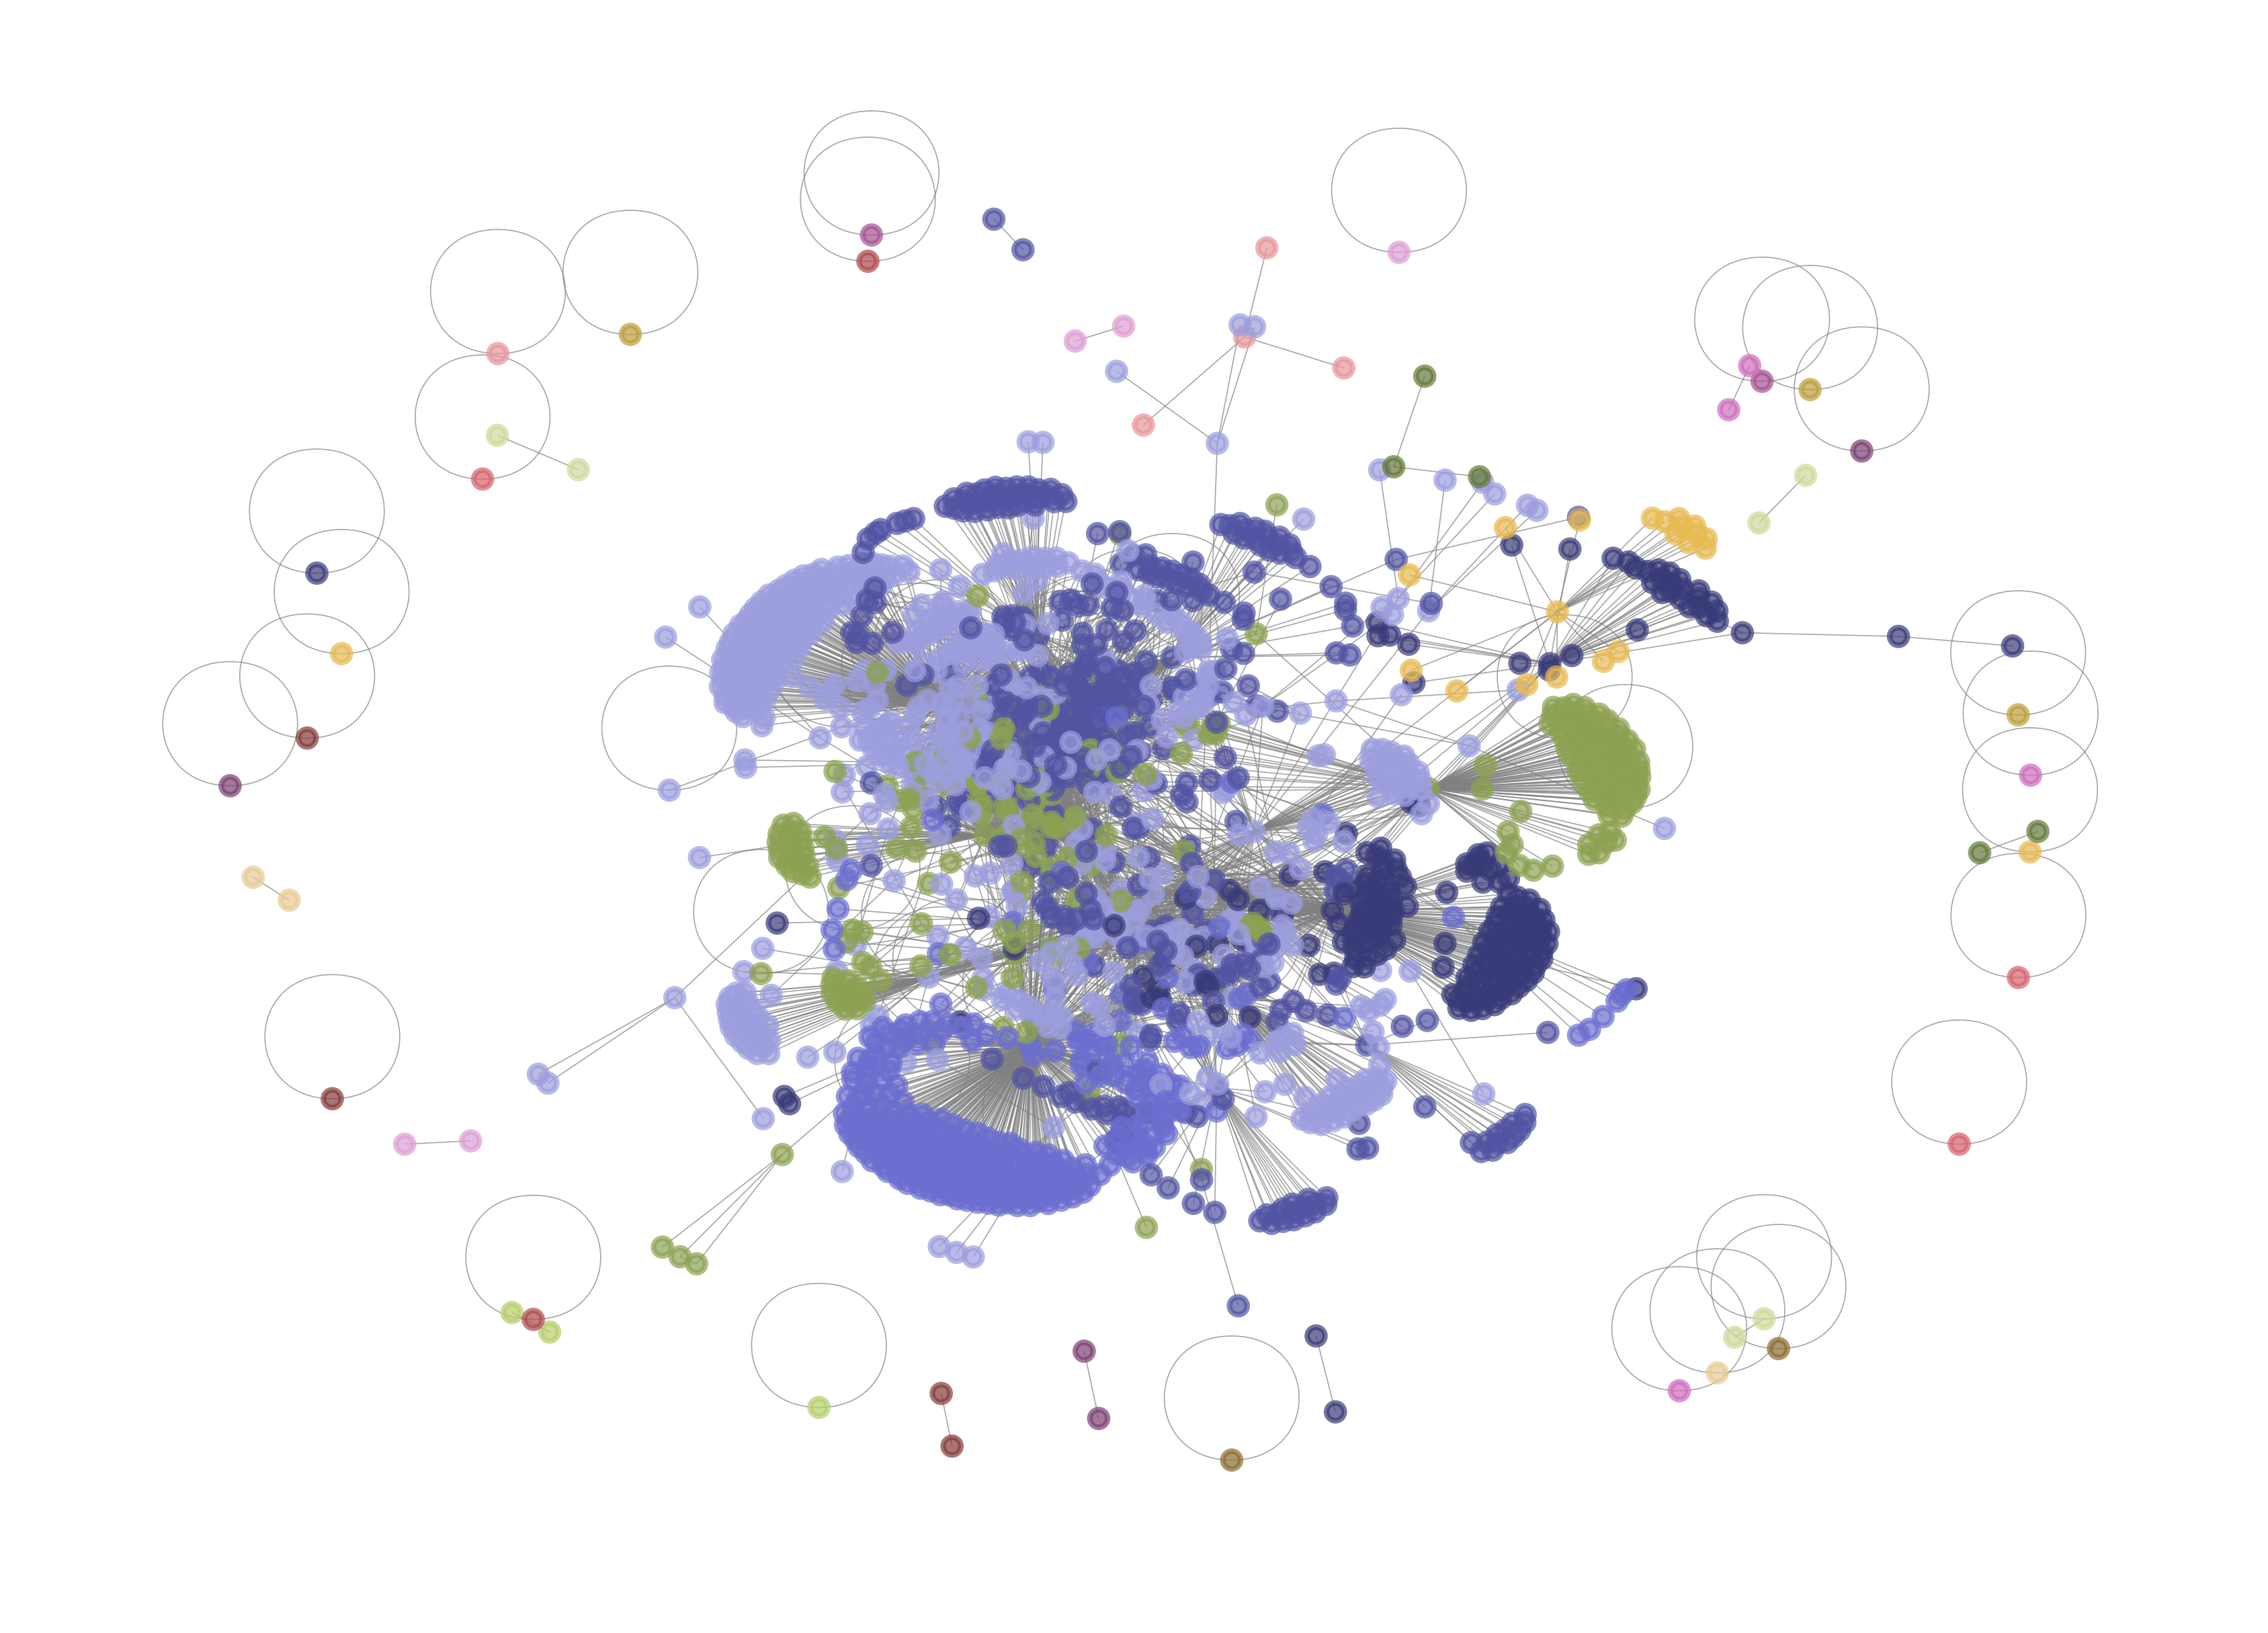

In [26]:
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(partitions['original_mod'].values())))))
colors_nodes = [colors_sns[partitions['original_mod'][node]] for node in G.nodes()]

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=300)
nx.draw(G, pos=pos, node_color=colors_nodes, with_labels=False, ax=ax, node_size=10, font_size=1, edge_color='gray', width=0.2, alpha=0.7)

plt.savefig('figure/fig_email_modularity.png', dpi=500, bbox_inches='tight')

plt.show()

#### (ii) Modularity for the partition found

In [27]:
community.modularity(partitions['original_mod'], G)

0.5749021717353324

#### (iii) Number of communities

In [28]:
len(set(partitions['original_mod'].values()))

52

#### (iv) Save partition as dictionary

In [29]:
# {node id: community id}
partitions['original_mod']

{'\ufeff419': 13,
 '465': 13,
 '869': 9,
 '453': 1,
 '943': 3,
 '1151': 3,
 '217': 3,
 '841': 3,
 '1998': 3,
 '882': 5,
 '449': 5,
 '1159': 1,
 '1377': 5,
 '498': 5,
 '1669': 6,
 '137': 10,
 '1800': 1,
 '1037': 5,
 '430': 5,
 '1952': 5,
 '1306': 5,
 '246': 5,
 '1831': 1,
 '155': 9,
 '266': 13,
 '359': 9,
 '1441': 5,
 '998': 5,
 '1339': 5,
 '1385': 1,
 '835': 1,
 '993': 8,
 '928': 9,
 '80': 5,
 '1444': 5,
 '1195': 5,
 '1981': 5,
 '691': 9,
 '1625': 3,
 '179': 1,
 '895': 9,
 '1550': 9,
 '1768': 9,
 '329': 9,
 '203': 9,
 '1987': 9,
 '702': 9,
 '634': 6,
 '2027': 9,
 '1948': 1,
 '1773': 5,
 '547': 5,
 '1874': 10,
 '31': 13,
 '223': 1,
 '805': 1,
 '1852': 1,
 '1384': 1,
 '1192': 9,
 '1587': 3,
 '713': 9,
 '1479': 9,
 '819': 9,
 '1780': 9,
 '142': 9,
 '1906': 6,
 '279': 9,
 '892': 9,
 '293': 1,
 '228': 1,
 '5': 1,
 '1629': 9,
 '1277': 9,
 '1287': 9,
 '1770': 13,
 '1825': 6,
 '2028': 1,
 '1881': 9,
 '1748': 9,
 '205': 9,
 '195': 9,
 '1328': 9,
 '1076': 1,
 '999': 3,
 '1258': 3,
 '1813': 1,
 '

### Question 3(b)

In [30]:
import graph_tool.all as gt

#### Helper function

In [31]:
def get_prop_type(value, key=None):
    """
    Performs typing and value conversion for the graph_tool PropertyMap class.
    If a key is provided, it also ensures the key is in a format that can be
    used with the PropertyMap. Returns a tuple, (type name, value, key).

    This function is adapted from Benjamin Bengfort's blog post!
    https://bbengfort.github.io/2016/06/graph-tool-from-networkx/
    """
    if isinstance(key, str):  # Keep the key as a string
        key = key  # No encoding necessary in Python 3

    # Deal with the value
    if isinstance(value, bool):
        tname = 'bool'

    elif isinstance(value, int):
        tname = 'float'
        value = float(value)

    elif isinstance(value, float):
        tname = 'float'

    elif isinstance(value, str):
        tname = 'string'
        
    elif isinstance(value, bytes):
        tname = 'bytes'

    elif isinstance(value, dict):
        tname = 'object'

    else:
        tname = 'string'
        value = str(value)

    return tname, value, key


def nx2gt(nxG):
    """
    Converts a networkx graph to a graph-tool graph.
    """
    # Phase 0: Create a directed or undirected graph-tool Graph
    gtG = gt.Graph(directed=nxG.is_directed())

    # Add the Graph properties as "internal properties"
    for key, value in nxG.graph.items():
        # Convert the value and key into a type for graph-tool
        tname, value, key = get_prop_type(value, key)

        prop = gtG.new_graph_property(tname) # Create the PropertyMap
        gtG.graph_properties[key] = prop     # Set the PropertyMap
        gtG.graph_properties[key] = value    # Set the actual value

    # Phase 1: Add the vertex and edge property maps
    # Go through all nodes and edges and add seen properties
    # Add the node properties first
    nprops = set() # cache keys to only add properties once
    for node, data in nxG.nodes(data=True):

        # Go through all the properties if not seen and add them.
        for key, val in data.items():
            if key in nprops: continue # Skip properties already added

            # Convert the value and key into a type for graph-tool
            tname, _, key  = get_prop_type(val, key)

            prop = gtG.new_vertex_property(tname) # Create the PropertyMap
            gtG.vertex_properties[key] = prop     # Set the PropertyMap

            # Add the key to the already seen properties
            nprops.add(key)

    # Also add the node id: in NetworkX a node can be any hashable type, but
    # in graph-tool node are defined as indices. So we capture any strings
    # in a special PropertyMap called 'id' -- modify as needed!
    gtG.vertex_properties['id'] = gtG.new_vertex_property('string')

    # Add the edge properties second
    eprops = set() # cache keys to only add properties once
    for src, dst, data in nxG.edges(data=True):

        # Go through all the edge properties if not seen and add them.
        for key, val in data.items():
            if key in eprops: continue # Skip properties already added

            # Convert the value and key into a type for graph-tool
            tname, _, key = get_prop_type(val, key)

            prop = gtG.new_edge_property(tname) # Create the PropertyMap
            gtG.edge_properties[key] = prop     # Set the PropertyMap

            # Add the key to the already seen properties
            eprops.add(key)

    # Phase 2: Actually add all the nodes and vertices with their properties
    # Add the nodes
    vertices = {} # vertex mapping for tracking edges later
    for node, data in nxG.nodes(data=True):

        # Create the vertex and annotate for our edges later
        v = gtG.add_vertex()
        vertices[node] = v

        # Set the vertex properties, not forgetting the id property
        data['id'] = str(node)
        for key, value in data.items():
            gtG.vp[key][v] = value # vp is short for vertex_properties

    # Add the edges
    for src, dst, data in nxG.edges(data=True):

        # Look up the vertex structs from our vertices mapping and add edge.
        e = gtG.add_edge(vertices[src], vertices[dst])

        # Add the edge properties
        for key, value in data.items():
            gtG.ep[key][e] = value # ep is short for edge_properties

    # Done, finally!
    return gtG

In [32]:
# def get_partition_gt(G):

#     G_gt = nx2gt(G)
#     state = gt.minimize_blockmodel_dl(G_gt)
#     partition = {}
#     for i, block in enumerate(state.get_blocks()):
#         partition[i] = block

#     return [partition, state]

def get_partition_gt(G):

    G_gt = nx2gt(G)
    state = gt.minimize_nested_blockmodel_dl(G_gt)
    partition = {}
    for i, block in enumerate(state.get_levels()[0].get_blocks()):
        partition[i] = block

    return [partition, state]

#### Load network in graphtool

In [33]:
G_gt = nx2gt(G)

#### Infer partition using Nested Stochastic Block Model (NSBM)

In [34]:
state = gt.minimize_nested_blockmodel_dl(G_gt)

In [35]:
state

<NestedBlockState object, with base <BlockState object with 1892 blocks (11 nonempty), degree-corrected, for graph <Graph object, undirected, with 1892 vertices and 4466 edges, 1 internal vertex property, at 0x7f595ef89460>, at 0x7f595ef8b8c0>, and 12 levels of sizes [(1892, 11), (11, 4), (4, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7f595ef8b920>

#### Save partition as dictionary

In [36]:
# For SBM
# partition_gt = {}
# for i, block in enumerate(state.get_blocks()):
#     partition_gt[i] = block

In [37]:
# Save the first level partition for nested SBM
partition_gt = {}
for i, block in enumerate(state.get_levels()[0].get_blocks()):
    partition_gt[i] = block

In [38]:
partitions['original_gt'] = partition_gt
partitions['original_gt']

{0: 1289,
 1: 1118,
 2: 599,
 3: 542,
 4: 180,
 5: 493,
 6: 493,
 7: 493,
 8: 493,
 9: 599,
 10: 599,
 11: 542,
 12: 1355,
 13: 1035,
 14: 1355,
 15: 1035,
 16: 1035,
 17: 599,
 18: 599,
 19: 542,
 20: 599,
 21: 1355,
 22: 1035,
 23: 599,
 24: 1289,
 25: 599,
 26: 1035,
 27: 599,
 28: 1035,
 29: 1035,
 30: 1035,
 31: 542,
 32: 599,
 33: 599,
 34: 599,
 35: 1035,
 36: 599,
 37: 599,
 38: 1289,
 39: 1035,
 40: 542,
 41: 599,
 42: 921,
 43: 599,
 44: 921,
 45: 1118,
 46: 599,
 47: 493,
 48: 599,
 49: 1035,
 50: 599,
 51: 542,
 52: 1247,
 53: 1118,
 54: 1035,
 55: 1035,
 56: 1035,
 57: 1035,
 58: 599,
 59: 180,
 60: 599,
 61: 1035,
 62: 599,
 63: 1035,
 64: 1035,
 65: 599,
 66: 599,
 67: 1035,
 68: 599,
 69: 1035,
 70: 1035,
 71: 599,
 72: 542,
 73: 542,
 74: 1118,
 75: 1552,
 76: 1035,
 77: 599,
 78: 599,
 79: 599,
 80: 1035,
 81: 599,
 82: 1035,
 83: 180,
 84: 180,
 85: 599,
 86: 599,
 87: 599,
 88: 599,
 89: 1035,
 90: 1035,
 91: 1035,
 92: 1035,
 93: 1289,
 94: 599,
 95: 1035,
 96: 103

#### Number of communities

In [39]:
# Level 0 is the observed network
# We look at the first level
state.get_levels()[1].get_B()

11

In [40]:
# This also matches
count_community_from_partition(partitions['original_gt'])

11

In [41]:
# We can also get the number of partitions for each levels
# B is the number of partitions
state.print_summary()

l: 0, N: 1892, B: 11
l: 1, N: 11, B: 4
l: 2, N: 4, B: 1
l: 3, N: 1, B: 1


#### Visualization

In [42]:
# fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=300)
state.levels[0].draw(output="figure/fig_email_nsbm.png", output_size=(1000, 1000));
# plt.show()

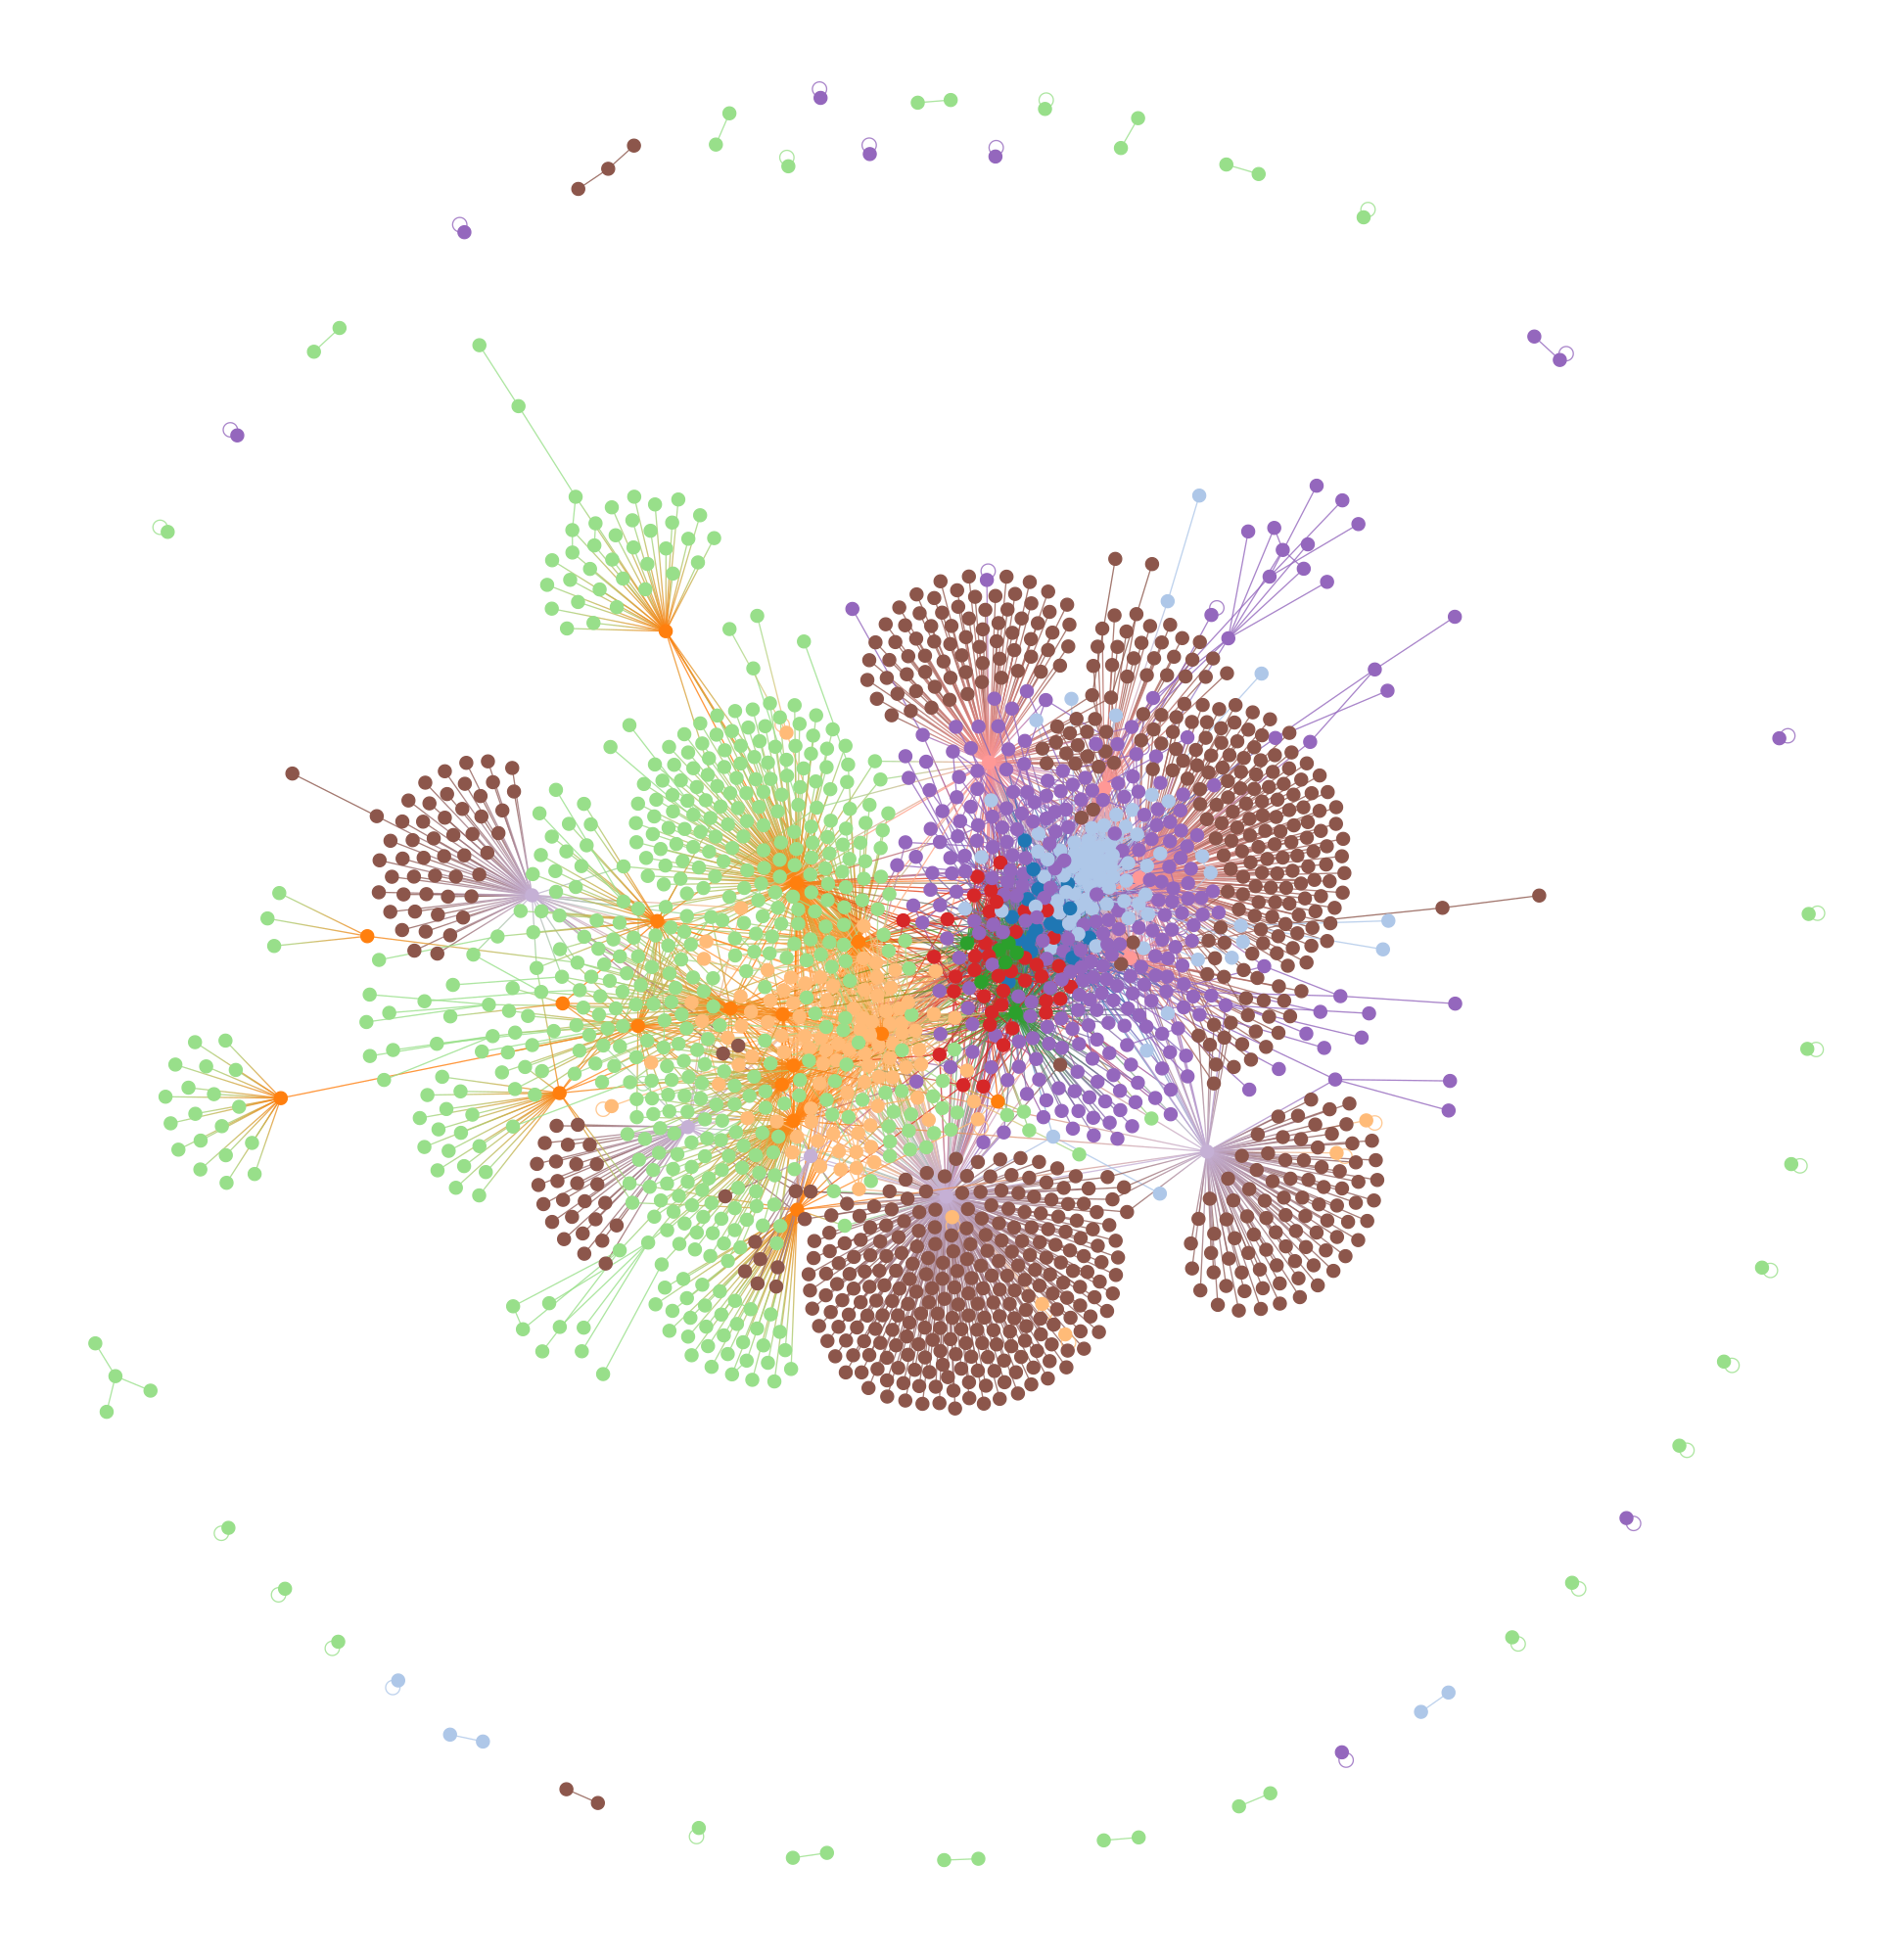

In [43]:
from IPython.display import Image, display
display(Image(filename="figure/fig_email_nsbm.png"))

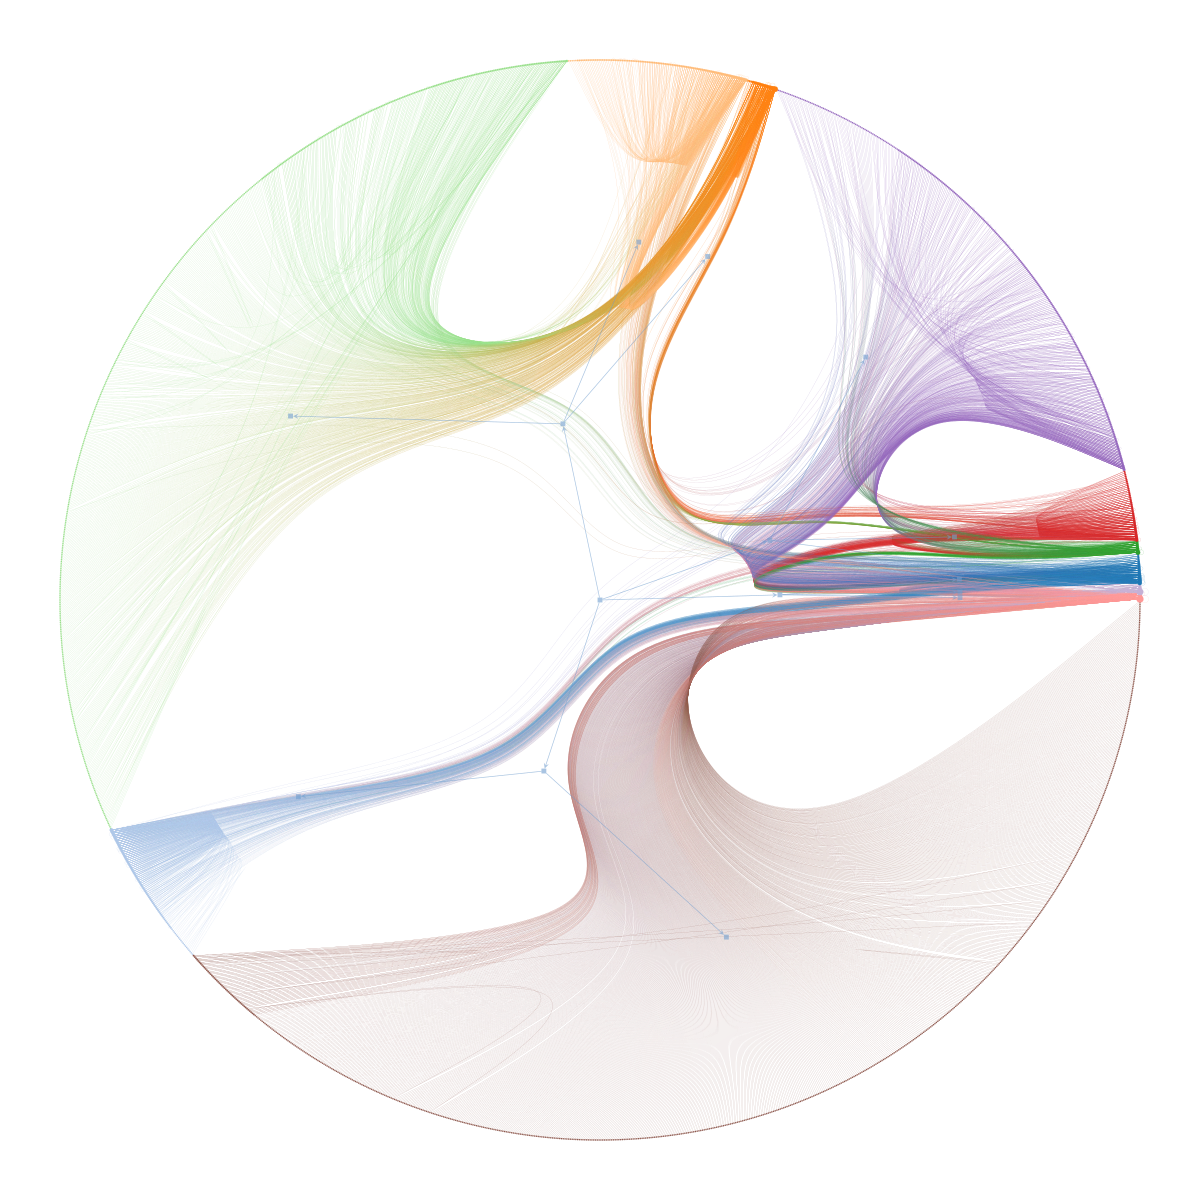

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f595ef89460, at 0x7f595ef8a330>,
 <GraphView object, directed, with 1908 vertices and 1907 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7f595c21d0d0, at 0x7f595c21c710>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7f595c21d0d0, at 0x7f595c21cb90>, False), at 0x7f595c21d0d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f595c21d0d0, at 0x7f595ef8b320>)

In [44]:
state.draw()

### Question 3(c)

In [45]:
# Degree preserving randomization
G_random = G.copy()
G_random = nx.double_edge_swap(G_random, nswap=G_random.number_of_nodes()*5, max_tries=G_random.number_of_nodes()*10)

In [46]:
def plot_degree_distribution(ax, G, number_of_bins=10):

    def make_degree_distribution(G, number_of_bins=15, log_binning=True, density=True):
        """
        Given a degree sequence, return the y values (probability) and the
        x values (support) of a degree distribution that you're going to plot.
        
        Parameters
        ----------
        G (nx.Graph):
            the network whose degree distribution to calculate
    
        number_of_bins (int):
            length of output vectors
        
        log_binning (bool):
            if you are plotting on a log-log axis, then this is useful
        
        density (bool):
            whether to return counts or probability density (default: True)
            Note: probability densities integrate to 1 but do not sum to 1. 
            
        Returns
        -------
        hist, bins (np.ndarray):
            probability density if density=True node counts if density=False; binned edges
        
        """
        
        # Step 1: We will first need to define the support of our distribution
        k = list(dict(G.degree()).values()) # get the degree of each node
        kmax = np.max(k)                    # get the maximum degree
        
        # Step 2: Then we'll need to construct bins
        if log_binning:
            # array of bin edges including rightmost and leftmost
            bins = np.logspace(0,np.log10(kmax+1),number_of_bins+1)
        
        else:
            bins = np.linspace(0,kmax+1,num=number_of_bins+1)
        
        # Step 3: Then we can compute the histogram using numpy
        hist, _ = np.histogram(k,bins,density=density)
    
        return bins[1:], hist
    
    deg_dist_x, deg_dist_y = make_degree_distribution(G, number_of_bins)
    
    ax.loglog(deg_dist_x, deg_dist_y, marker='o', lw=0)
    
    ax.set_title("Degree Distribution")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

In [47]:
# degree_fig, degree_axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# plot_degree_distribution(degree_axs[0], G, number_of_bins=10)
# plot_degree_distribution(degree_axs[1], G_random, number_of_bins=10)

In [48]:
# "partitions" dictionary already has
# partitions['original_mod']
# partitions['original_gt']

# We add partitions for the network after degree-preserving randomization
partitions['random_mod'] = get_partition_modularity(G_random)[0]
partitions['random_gt'] = get_partition_gt(G_random)[0]

In [49]:
for item in partitions:
    print(item)
    print(count_community_from_partition(partitions[item]))

original_mod
52
original_gt
11
random_mod
66
random_gt
3
